In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [18]:
data = pd.read_excel('Final Dataset.xlsx', header=0)

In [19]:
# Scaling features
features = data[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

Number of clusters: 2, Silhouette Score: 0.411474983853515
Number of clusters: 3, Silhouette Score: 0.30156404028199374
Number of clusters: 4, Silhouette Score: 0.24671488696881025
Number of clusters: 5, Silhouette Score: 0.2431444187444878


/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

Number of clusters: 6, Silhouette Score: 0.22138266305853369
Number of clusters: 7, Silhouette Score: 0.2077219100734565
Number of clusters: 8, Silhouette Score: 0.16841779674851487
Number of clusters: 9, Silhouette Score: 0.16613874781911106
Number of clusters: 10, Silhouette Score: 0.16875380380420835


/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


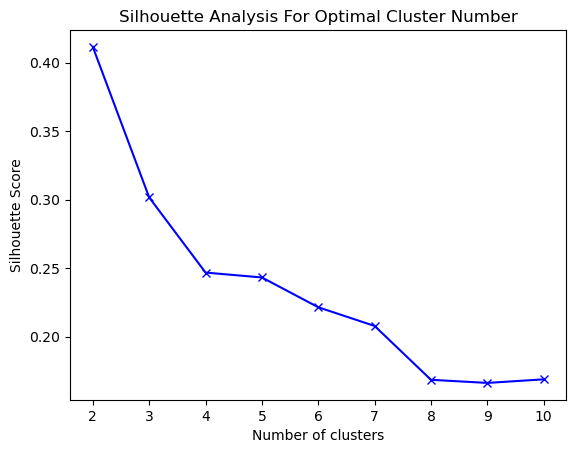

In [20]:
# Determining optimal # of clusters using silhouette score
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")
    
plt.plot(cluster_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal Cluster Number')
plt.show()

In [21]:
# Assigning clusters
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans.fit(scaled_features)

data['cluster'] = kmeans.labels_
data[['titleartist', 'cluster']].head()

,titleartist,cluster
0,OHEMA (with Crayon & Bella Shmurda)Victony,2
1,Holy GhostOmah Lay,2
2,NgoziCrayon,0
3,RushAyra Starr,2
4,Till We Die (feat. Ruger)Sarkodie,0


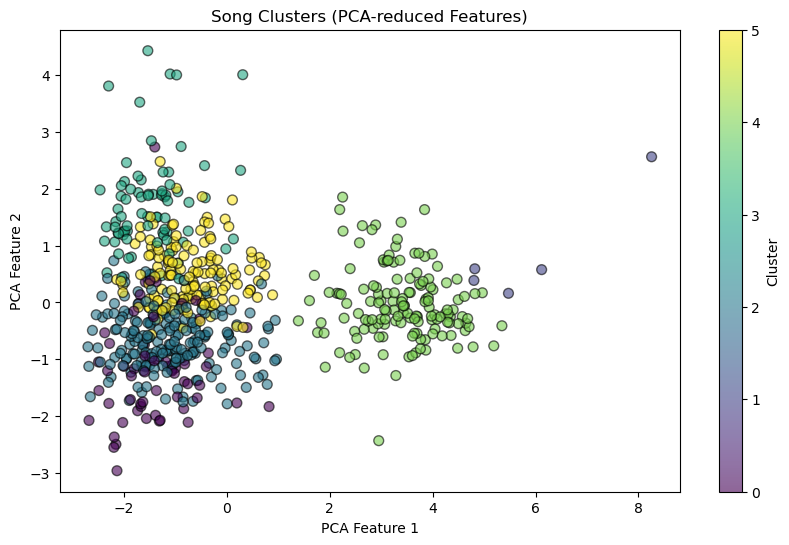

In [22]:
# Graphing with PCA 
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Song Clusters (PCA-reduced Features)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [25]:
def recommend_songs_by_features(df, features, scaler, kmeans, n_recommendations=5):
    """
    Recommend songs similar to the given song features.
    
    Parameters:
    - df: DataFrame containing the songs, their features, and cluster labels.
    - features: List of song features in the order they were scaled during training. Example: [bpm, nrgy, dnce, live, val, dur, acous, spch, pop]
    - n_recommendations: Number of songs to recommend (default is 5).
    - scaler: The StandardScaler instance used to scale training data.
    - kmeans: The trained KMeans model.
    
    Returns:
    - List of recommended song titles. Returns an empty list if there are no recommendations.
    """
    # Scale the input features using the same scaler used during training
    scaled_features = scaler.transform([features])
    
    # Predict the cluster for the input song features
    predicted_cluster = kmeans.predict(scaled_features)[0]
    
    # Filter songs from the predicted cluster
    similar_songs = df[df['cluster'] == predicted_cluster]
    
    # Check if there are enough songs for recommendations
    if len(similar_songs) >= n_recommendations:
        # Return a random sample of n_recommendations
        return similar_songs.sample(n=n_recommendations)['titleartist'].tolist()
    else:
        # Return an empty list if there are no enough songs for recommendations
        return []

In [30]:
feature_names = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
# Insert a songs features here
symphony_features = [84, 0, 15, -36, 13, 4, 775, 89, 4, 45]

# Call function, pass in the songs features
recommendations = recommend_songs_by_features(data, symphony_features, scaler, kmeans)
print(recommendations)

['Vaughan Williams: Job, a Masque for Dancing, Scene 9: EpilogueRalph Vaughan Williams', 'BhaktiIshq', 'Violin Sonata in A major, FWV 8: IV. Allegretto poco mossoCésar Franck', "Prélude à l'après-midi d'un faune, L.86Claude Debussy", 'An der schönen blauen Donau, Op. 314Johann Strauss II']


/Users/amykang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
# Cluster quality using calinski score
labels = kmeans.fit_predict(scaled_features)
calinski_harabasz = calinski_harabasz_score(scaled_features, labels)

print("Calinski-Harabasz Index:", calinski_harabasz)

Calinski-Harabasz Index: 176.46448977571563
